In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

In [ ]:
scaled_y, scaled_y.shape 

In [ ]:
scaled_y.reshape(20,)

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

In [ ]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1] and bias is b
    # equation for price is w1*area + w2*bedrooms + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

In [ ]:
predict(2770,3,w,b)

In [ ]:
predict(1175,2,w,b)

In [ ]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

In [ ]:
w, b, cost

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [ ]:
predict(1000,2,w_sgd, b_sgd), predict(1000,2, w, b) 

In [ ]:
predict(1500,3,w_sgd, b_sgd)

In [173]:
import random
def MBGD(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
#         random_indices = np.random.permutation(total_samples)
#         X_tmp = X[random_indices]
#         y_tmp = y_true[random_indices]
        
        idx = random.sample(range(X.shape[0]), batch_size)
        
        for j in range(0,total_samples,batch_size):
#             Xj = X_tmp[j:j+batch_size]
#             yj = y_tmp[j:j+batch_size]

            batch_x = X[idx]
            batch_y = y_true[idx]
        
            y_predicted = np.dot(w, batch_x.T) + b
            
            w_grad = -(2/len(batch_x))*(batch_x.T.dot(batch_y-y_predicted))
            b_grad = -(2/len(batch_x))*np.sum(batch_y-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(batch_y-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    
    
    return w, b, cost, cost_list, epoch_list

In [174]:
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = MBGD(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71008953, 0.67817883]), -0.23331050457940194, 0.0036354217845260537)

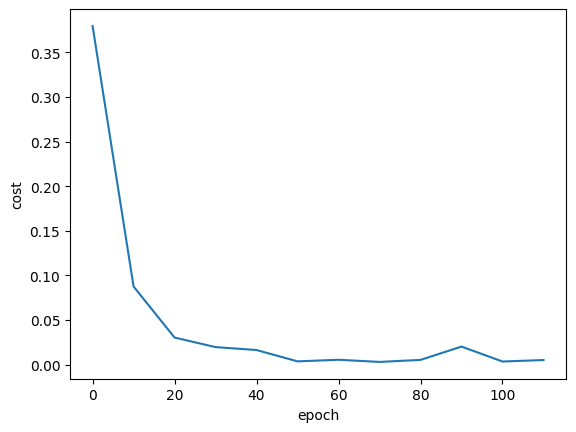

In [162]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd,cost_list_mbgd)

In [ ]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1] and bias is b
    # equation for price is w1*area + w2*bedrooms + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

In [ ]:
def pred_test(area,bedrooms):
    print("MBGD", predict(area,bedrooms,w_mbgd, b_mbgd))
    print("GD", predict(area,bedrooms,w, b))
    print("SGD", predict(area,bedrooms,w_sgd, b_sgd))